In [67]:
import numpy as np 
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from time import sleep
from tqdm import tqdm 
import random 

from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

In [68]:
env = gym.make('FrozenLake-v1', render_mode = 'ansi').env

In [69]:
alpha = 0.8
gamma = 0.95


In [70]:
env.observation_space

Discrete(16)

### Q Learning Agent

In [71]:
class Agent:
    def __init__(self, env, alpha, gamma):
        self.env   = env 
        self.alpha = alpha
        self.gamma = gamma
        
        self.Q = np.zeros([env.observation_space.n, env.action_space.n])
        
    def action(self, state):
        return np.argmax(self.Q[state]) 
    
    def QUpdate(self, state, action, next_state, reward):
        
        # Q learning equation update
        self.Q[state, action] = self.Q[state, action] + \
                                self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[state,action])
    
    def train(self, epoches = 20000, epsilon = 1):
        
        timesteps_per_episode = []
        penalties_per_episode = []
        
        min_epsilon = 0.01 
        max_epsilon = 1
        
        epsilon = 1 
        decay_rate = 0.005
        
        for i in tqdm(range(epoches)):
            
            state = env.reset()[0]
            epochs, penalties, total_reward = 0, 0, 0
            done = False
            
            while not done: 
                if random.uniform(0,1) <= epsilon:
                    action = env.action_space.sample()
                else: 
                    action = self.action(state) 
                
                # print(env.step(action))
                next_state, reward, done, info, more_info = env.step(action)
                
                done = done or info 
                
                self.QUpdate(state, action, next_state, reward) 

                state = next_state
                epochs += 1
                total_reward += reward
                
            epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*(i + 1))
        
            timesteps_per_episode.append(epochs)
            penalties_per_episode.append(total_reward) 
        
        
        print("Average reward: ", np.mean(penalties_per_episode))
        fig, ax = plt.subplots(figsize = (12, 4))
        ax.set_title("Time Taken to finish")
        ax.set_ylabel('Time taken')
        ax.set_xlabel('Episode')     
        pd.Series(timesteps_per_episode).plot(kind='line')
        plt.show()

        fig, ax = plt.subplots(figsize = (12, 4))
        ax.set_title("Rewards for each episode")  
        ax.set_ylabel('Penalty')
        ax.set_xlabel('Episode')    
        pd.Series(penalties_per_episode).plot(kind='line')
        plt.show()
    
    def run(self):
        
        state = env.reset()[0]
        
        env.s = state
        done = False

        reward = 0
        penalties = 0 
        
        # store frames to latter plot them
        frames = []
        steps = 0
        
        while not done:
            action = self.action(state)
    
            next_state, reward, done, info , more_info = env.step(action)
            
            done = done or info 
            
            frames.append(env.render())
            state = next_state 
            steps += 1
            
        
        print("Finished")
        print("Time taken: ",steps)
        
        return frames 

In [72]:
agent = Agent(gamma = gamma, alpha = alpha, env = env)

100%|██████████| 20000/20000 [00:13<00:00, 1468.21it/s]


Average reward:  0.5265


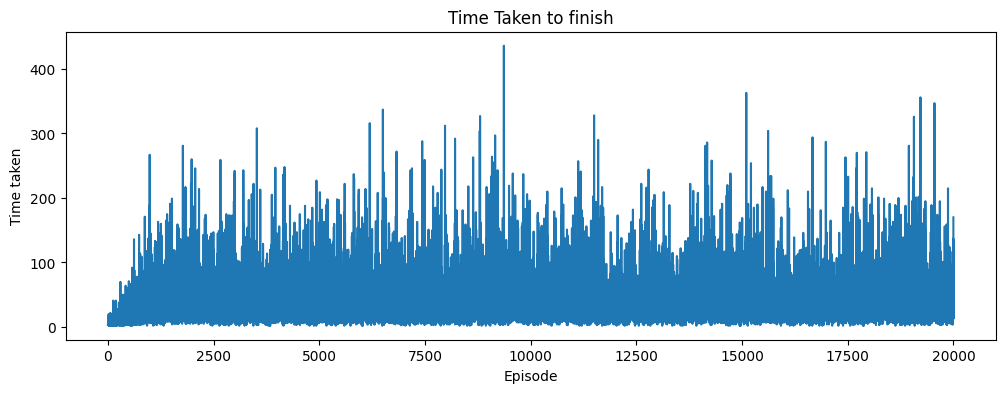

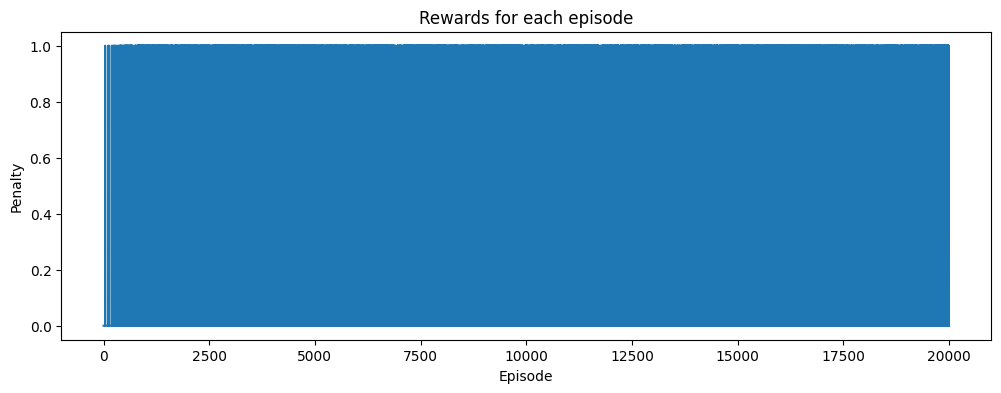

In [73]:
agent.train()

In [74]:
frames = agent.run()

Finished
Time taken:  43


In [75]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame)
        sleep(1)
        
print_frames(frames)

  (Down)
SFFF
FHFH
FFFH
HFFG

